<h1>Example Mission Tracks</h1>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cftime
import datetime
import cmocean
%matplotlib widget

In [15]:
def plotMissionArray(mission_nc, ax_obj, fig):
    # Load in netCDF file as a dataset
    mission_dataset = nc.Dataset(mission_nc, mode='r')

    # Get list of all microSWIFTs on the mission
    microSWIFTs_on_mission = list(mission_dataset.groups.keys())

    # Create map of all drift tracks during mission
    ax_obj.set_xlabel('Cross Shore Location, x [m]')
    ax_obj.set_ylabel('Along Shore Location, y [m]')

    # Plot bathymetry on subplot
    # bathy_file = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/geomorphology/DEMs/surveyDEM/data/FRF_geomorphology_DEMs_surveyDEM_20210928.nc'
    bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
    bathy_dataset = nc.Dataset(bathy_file)
    # Create grid from coordinates
    xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
    bathy = bathy_dataset['elevation'][0,:,:]
    im =ax_obj.contourf(xFRF_grid, yFRF_grid, bathy, cmap=cmocean.cm.deep_r)
    cbar_bathy = fig.colorbar(im, ax=ax_obj, fraction=0.046, pad=0.04, location='top', orientation='horizontal')
    cbar_bathy.ax.set_xlabel('Elevation, z [m]')
    min_time_label = mission_dataset['time'][0]
    max_time_label = mission_dataset['time'][-1]
                
    # Plot the track from each microSWIFT on the mission
    for microSWIFT in microSWIFTs_on_mission:
        x = mission_dataset[microSWIFT]['xFRF'][:]
        y = mission_dataset[microSWIFT]['yFRF'][:]
        map = ax_obj.scatter(x, y, c=mission_dataset['time'][:], s=1, cmap='plasma')

    # Figure Properties
    time_labels = cftime.num2pydate([min_time_label, max_time_label],units=mission_dataset['time'].units, calendar=mission_dataset['time'].calendar)
            
    # Set colorbar and figure properties
    cbar = fig.colorbar(map, ax=ax_obj, ticks=[min_time_label, max_time_label], orientation='horizontal')
    map.set_clim([min_time_label, max_time_label])
    ax_obj.set_xlim([50, 900])
    ax_obj.set_ylim([-100, 1100])
    cbar.ax.set_xlabel('Time [UTC]')
    time_labels = [time_labels[0].strftime('%Y-%m-%d %H:%M'), time_labels[1].strftime('%Y-%m-%d %H:%M')]
    cbar.ax.set_xticklabels(time_labels, rotation=0, va='center')


    # Close the Dataset
    mission_dataset.close()


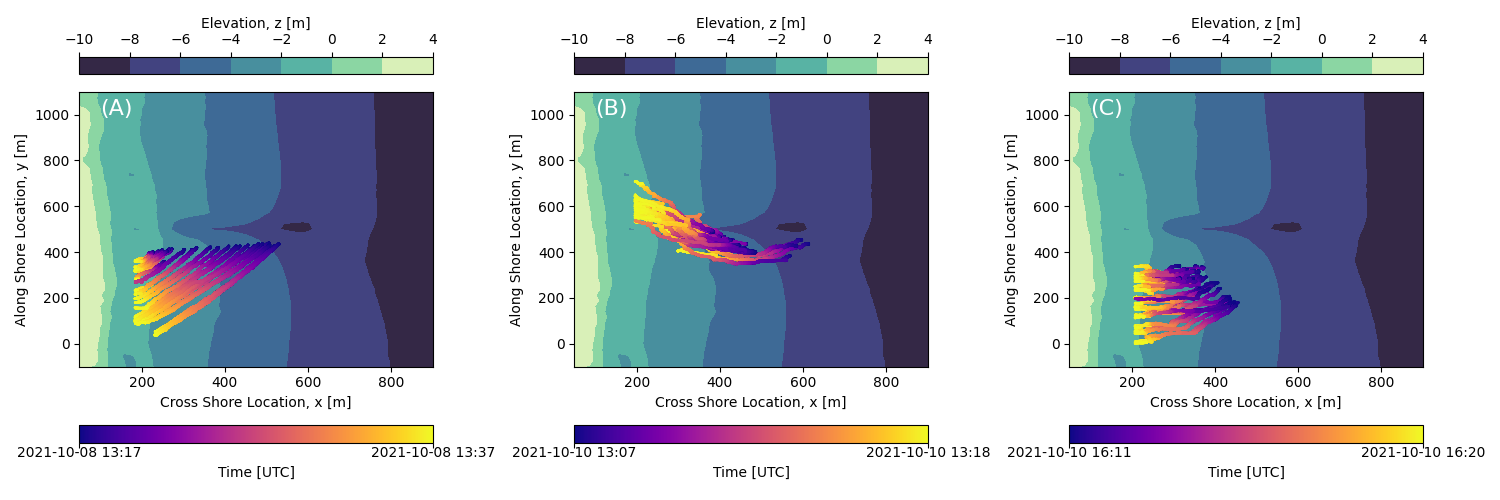

In [16]:
# PLot Example Mission Arrays Over Bathymetry
fig_tracks, (ax1, ax2, ax3) = plt.subplots(figsize=(15,5), ncols=3)

# Mission 15 
mission_15_nc = '../microSWIFT_data/cleanedDataset/mission_15.nc'
plotMissionArray(mission_15_nc, ax1, fig_tracks)
ax1.annotate('(A)', (100,1000), color='w', fontsize=16)

# Mission 20
mission_20_nc = '../microSWIFT_data/cleanedDataset/mission_20.nc'
plotMissionArray(mission_20_nc, ax2, fig_tracks)
ax2.annotate('(B)', (100,1000), color='w', fontsize=16)

# Mission 23
mission_23_nc = '../microSWIFT_data/cleanedDataset/mission_23.nc'
plotMissionArray(mission_23_nc, ax3, fig_tracks)
ax3.annotate('(C)', (100,1000), color='w', fontsize=16)

# Figure Properties
fig_tracks.tight_layout()
fig_tracks.savefig('./exampleTracks.png')
